In [1]:
import numpy as np
import pandas as pd
# from pandas import Series, DataFrame 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, validation_curve

# from xgboost import XGBClassifier
import lightgbm as ltb
# from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import joblib
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
pd.set_option('display.width', 10000)


C:\Users\makif\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df=pd.read_csv("d_encoded_sirali.csv")

In [3]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,LEVEL,EXPERIENCE,POSITION_DATA SCIENTIST,POSITION_DATABASE ADMIN,POSITION_DEVOPS ENGINEER,POSITION_EMBEDDED SOFTWARE DEVELOPER,POSITION_FRONT-END DEVELOPER,POSITION_FULL STACK DEVELOPER,POSITION_GAME DEVELOPER,POSITION_MOBILE APPLICATION DEVELOPER,...,WORK_TYPE_Geçici Remote,WORK_TYPE_Hibrit,WORK_TYPE_Ofis,WORK_TYPE_Remote,CITY_yurt_ici,CURRENCY_£ - Sterlin,CURRENCY_€ - Euro,CURRENCY_₺ - Türk Lirası,SALARY_AVG_TL,POSITION_CTO
0,1,2,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,15499,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,8499,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,15499,0
3,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,10499,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,5499,0


In [6]:
#Bagımlı ve bagımsız degiskenlerimizi ayırıyoruz
y = df["SALARY_AVG_TL"]
X = df.drop(["SALARY_AVG_TL"], axis=1)

In [7]:
## Train verisi ile model kurup, model başarısını değerlendirelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [8]:
#Gradient boosting Regressor

In [9]:
# Modeli train seti üzerinde kuralım
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [10]:
#ilk model basarısını degerlendirme
# Train RMSE
y_pred = gbr_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

14769.516052713881

In [11]:
# TRAIN R-Kare
gbr_model.score(X_train, y_train)

0.7419982483637184

In [12]:
# Test RMSE; Train seti üzerinden kurduğumuz modeli test seti üzerinde kullanıp ort hata miktarına bakıyoruz
y_pred = gbr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

19088.43943229381

In [13]:
np.mean(cross_val_score(gbr_model,
                        X_test,              # Bağımsız değişkenler
                        y_test,              # Bağımlı değişken
                        cv=5,
                        scoring='r2'))

0.5008168815406132

In [14]:
#hiperparametre optimizasyonu

In [15]:


# Varsayılan değerler
gbr_model.get_params()



{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [25]:
parameters = {'n_estimators'        : [50, 150, 500,750],
              'max_depth'           : [1,3, 7, 10],
              'learning_rate'       : [0.01, 0.05],
              'min_samples_split'   : [0.1, 0.3, 0.5],
              'subsample'           : [0.5, 0.7]
             }

In [26]:
# Making an object grid_GBC for GridSearchCV and fitting the dataset i.e X and y
grid = GridSearchCV(estimator=gbr_model,    # Model object
                    param_grid = parameters,
                    cv = 2,     # Number of folds for Cross Validation 
                    n_jobs=-1)  # Use all processors to maximize performance

grid.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                 max_depth=10,
                                                 min_samples_split=0.3,
                                                 n_estimators=500,
                                                 subsample=0.5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05],
                         'max_depth': [1, 3, 7, 10],
                         'min_samples_split': [0.1, 0.3, 0.5],
                         'n_estimators': [50, 150, 500, 750],
                         'subsample': [0.5, 0.7]})

In [27]:
# Now we are using print statements to print the results. It will give the values of hyperparameters as a result.
print(" - - - - Results from Grid Search - - - - " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

 - - - - Results from Grid Search - - - - 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.05, max_depth=7,
                          min_samples_split=0.3, n_estimators=500,
                          subsample=0.5)

 The best score across ALL searched params:
 0.6552075710278396

 The best parameters across ALL searched params:
 {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_split': 0.3, 'n_estimators': 500, 'subsample': 0.5}


In [28]:
grid.best_params_

{'learning_rate': 0.05,
 'max_depth': 7,
 'min_samples_split': 0.3,
 'n_estimators': 500,
 'subsample': 0.5}

In [29]:
#Bulduğumuz en iyi değerleri bir sözlüğe kaydedelim ki her seferinde GridSearchCV çalıştırmak çalıştırmak zorunda kalmayalım.
best_hipars = {'learning_rate': 0.05,
               'max_depth': 7,
               'min_samples_split': 0.3,
               'n_estimators': 500,
               'subsample': 0.5}

In [30]:
# Modeli en iyi parametre değerleri ile tekrar fit edelim
gbr_final = gbr_model.set_params(**best_hipars).fit(X, y)



In [31]:
# Bakalım yeni parametreler modelimize uygulanmış mı
gbr_final.get_params()  # BİNGO !

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'squared_error',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 0.3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.5,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [32]:
#final modeli basarı degerlendirmesi
#rmse


np.mean(np.sqrt(-cross_val_score(gbr_final,
                                 X,                     # Bağımsız değişkenler
                                 y,                     # Bağımlı değişken
                                 cv=5,
                                 scoring="neg_mean_squared_error")))

17348.943054707855

In [33]:
#rkare


np.mean(cross_val_score(gbr_final,
                        X_test,         # Bağımsız değişkenler
                        y_test,         # Bağımlı değişken
                        cv=5,
                        scoring='r2'))

0.5684417929351324

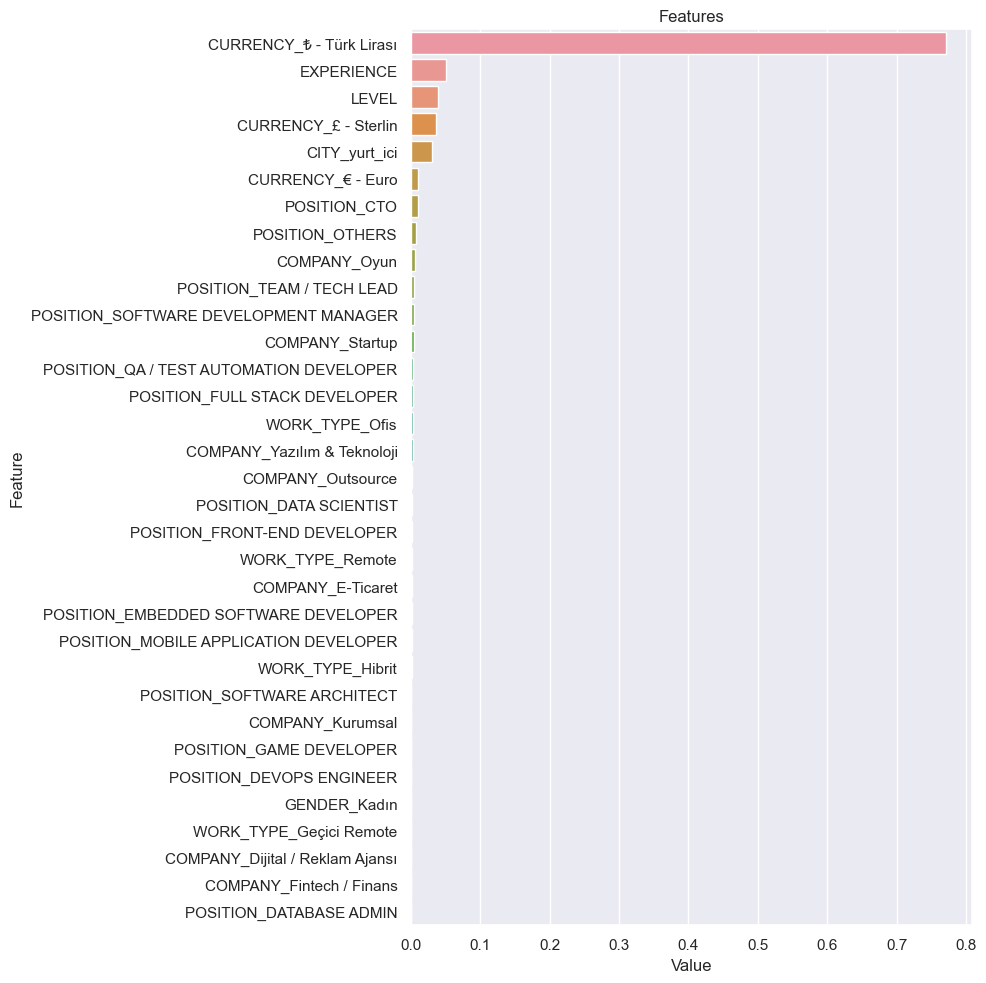

In [34]:
# Degiskenlerin önem düzeyini belirten feature importance
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

model = GradientBoostingRegressor()
model.fit(X, y)

plot_importance(model, X)

In [35]:
# Tüm gözlem birimleri için tahmin işlemi yapıp sonuçları sakla
y_pred_all = gbr_final.predict(X)
y_pred_all

array([14492.80532879,  7326.44701188, 13441.61365134, ...,
        9817.93652999, 18175.24427054,  8295.52397536])

In [36]:
# X test birimleri için tahmin işlemi yapıp sonuçları sakla
y_pred = gbr_final.predict(X_test)
y_pred

array([ 8868.40420173, 10260.8549154 , 37685.32824592, ...,
       10986.82970953, 68644.33238812, 66219.10307713])

In [37]:
y_test

1343      7499
2952      5499
184      25499
1465     14499
1314    121085
         ...  
3481     27499
574      14499
720      10499
261     195605
2487     27935
Name: SALARY_AVG_TL, Length: 1257, dtype: int64

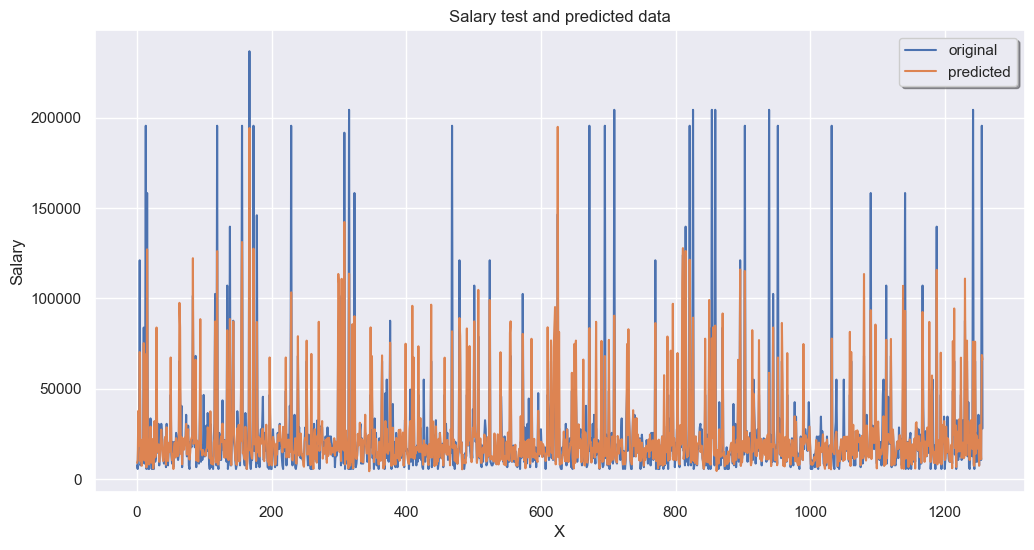

In [38]:
#BU GRAFİKTE Y_TEST'TEKİ DEGERLER VE BUNLARIN TAHMİNLERİ VAR
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Salary test and predicted data")
plt.xlabel('X')
plt.ylabel('Salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [39]:
#gercek degerlerle tahmin edilen degerleri birlikte görelim
veri=np.array(y_test)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(y_pred,columns = ["y_pred"])
dff.head(40)

,y_test,y_pred
0,7499,8868.404202
1,5499,10260.854915
2,25499,37685.328246
3,14499,18177.573012
4,121085,70261.659128
5,7499,9847.884306
6,8499,17450.145799
7,8499,7259.184728
8,15499,21805.103022
9,10499,12364.432696


In [40]:
#Model dosyası olusturma

In [ ]:
# Modeli dosya şeklinde diske kaydedelim
joblib.dump(gbr_final, "gbr_final.pkl")

In [ ]:
# Şimdi de bu dosyayı okuyalım
gbr_model_from_disc = joblib.load("gbr_final.pkl")

In [ ]:


# Gelen değerleri x değişkenine atadığımızı varsayalım.
# Aşağıdaki komutla x'i dataframe'e çevirip tahmin işlemi isteyebiliriz.
# gbr_model_from_disc.predict(pd.DataFrame(x).T)

